In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
random_seed = 42
df = pd.read_csv("data.csv")
Xtrain,Xtest,ytrain,ytest = train_test_split(df.drop(columns = ['survived']),df["survived"],test_size = 0.3,random_state = random_seed)
evaluation = pd.read_csv("evaluation.csv")
evaluation

,ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1000,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S,"Gunnislake, England / Butte, MT"
1,1001,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S,"Norwich / New York, NY"
2,1002,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN
3,1003,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,NaN,S,"Somerset / Bernardsville, NJ"
4,1004,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,"Philadelphia, PA"
...,...,...,...,...,...,...,...,...,...,...,...,...
304,1304,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C,"New York, NY"
305,1305,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,London
306,1306,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,NaN
307,1307,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN


([<matplotlib.patches.Wedge at 0x24dafb7e850>,
 [Text(-0.41410082571529183, 1.0190782630111948, 'survive'),
  Text(0.4141008257152913, -1.019078263011195, 'not survive')],
 [Text(-0.22587317766288642, 0.5558608707333789, '62.3%,'),
  Text(0.22587317766288612, -0.555860870733379, '37.7%,')])

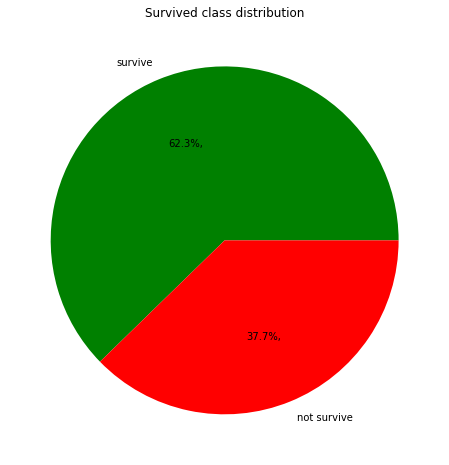

In [3]:
# Let's look at the distribution of the target variable **Survived**.
figure = plt.figure(figsize = (16,8))
survived_distribution =  ytrain.value_counts().values
survived_class =  ["survive","not survive"]
ax = figure.add_subplot()
ax.set_title("Survived class distribution")
ax.pie(survived_distribution,labels=survived_class,colors = ['g','r'],autopct='%1.1f%%,')

The pie chart shows that **slightly more passengers survived than not** (green > red), indicating a fairly balanced class distribution. This balance is beneficial for model training, reducing the need for class rebalancing and allowing standard metrics like accuracy to be more meaningful.

In [4]:
display(Xtrain.select_dtypes("object").columns)
display(Xtrain.select_dtypes("object"))

Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'home.dest'], dtype='object')

,name,sex,ticket,cabin,embarked,home.dest
541,"Moran, Mr. Daniel J",male,371110,NaN,Q,NaN
440,"O'Dwyer, Miss. Ellen ""Nellie""",female,330959,NaN,Q,NaN
482,"Warren, Mr. Charles William",male,C.A. 49867,NaN,S,NaN
422,"Gracie, Col. Archibald IV",male,113780,C51,C,"Washington, DC"
778,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,PC 17757,C62 C64,C,"New York, NY"
...,...,...,...,...,...,...
106,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,PC 17761,C86,C,"Deephaven, MN / Cedar Rapids, IA"
270,"Williams, Mr. Leslie",male,54636,NaN,S,NaN
860,"Clifford, Mr. George Quincy",male,110465,A14,S,"Stoughton, MA"
435,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,350026,NaN,S,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        796 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       1000 non-null   float64
 10  cabin      225 non-null    object 
 11  embarked   1000 non-null   object 
 12  home.dest  573 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


### Code Explanation

1. **Dropping Columns**: 
   We drop `"name"`, `"ticket"`, `"cabin"`, and `"home.dest"` because they are irrelevant or have too many missing values.

2. **One-Hot Encoding**: 
   We use `pd.get_dummies()` to convert categorical variables (`"sex"` and `"embarked"`) into numerical binary columns.

3. **Consistency**: 
   We apply these transformations to all datasets  to ensure uniformity for model training and evaluation.


In [6]:
datasets = [Xtrain,Xtest,evaluation]
for i in range(len(datasets)):
    datasets[i] = datasets[i].drop(columns=["name", "ticket", "cabin","home.dest"])
    datasets[i] = pd.get_dummies(datasets[i], columns=["sex", "embarked"])

Xtrain, Xtest,evaluation = datasets


### Code Explanation

1. **Calculate Training Set Mean**:  
   We compute the average age from the training set (`Xtrain["age"].mean()`) and round it to fill missing values consistently across datasets.

2. **Fill Missing Values**:  
   Using this average (`avg`), we replace `NaN` values in the `"age"` column for each dataset (`Xtrain`, `Xtest`). This avoids data leakage by ensuring only the training set's statistics are used.

In [7]:
avg = round(Xtrain["age"].mean())
for i in range(len(datasets)):
    datasets[i] = datasets[i].fillna(avg)
Xtrain, Xtest,evaluation = datasets

- We loop through each dataset  to remove duplicate rows based on the unique identifier `"ID"`,if such records exist. This prevents repeated samples that could bias the model.

In [8]:
for  i in range(len(datasets)):
    datasets[i] = datasets[i].drop_duplicates(subset = ["ID"])
Xtrain, Xtest,evaluation = datasets

Setting "ID" feachure as index

In [9]:
for i in range(len(datasets)):
    datasets[i] = datasets[i].set_index("ID")
Xtrain,Xtest,evaluation = datasets

### Code Overview

This code focuses on tuning the hyperparameters of a Decision Tree Classifier using cross-validation to find the best model configuration based on validation accuracy. The key steps include:

1. **Importing Libraries**: Necessary tools from `sklearn` are imported for parameter tuning and model evaluation.

2. **Defining Hyperparameter Grid**: A grid for the Decision Tree parameters (`max_depth` and `criterion`) is specified for tuning.

3. **Generating Parameter Combinations**: The `ParameterGrid` class creates all possible combinations of the specified parameters.

4. **Cross-Validation for Model Evaluation**: For each parameter combination, a `DecisionTreeClassifier` is evaluated using cross-validation, and the mean accuracy is recorded.

5. **Identifying the Best Model**: The best parameters are identified based on the highest cross-validated accuracy.

### Future Steps

Next, we will use this function to:

1. **Evaluate Model Performance on Default Tree Data**: 

2. **Assess Preprocessing Techniques**: Reuse the function to evaluate the model after applying to KNN:
   - **Standardization**: Scaling features to have a mean of 0 and a standard deviation of 1.
   - **Min-Max Normalization**: Scaling features to a fixed range ([0, 1]).

In [10]:
from sklearn.model_selection import ParameterGrid,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def best_params_research(Xtrain,knn = True):
    """
    Finds the best hyperparameters for Decision Tree or KNN classifier using cross-validation.
    
    Parameters:
    - Xtrain: Training features
    - ytrain: Training labels
    - knn (bool): If True, tune KNN; if False, tune Decision Tree.
    
    Returns:
    - best_metrics: Dictionary of the best hyperparameters
    """
    folders = 10
    random_seed = 42
    if not knn:
        param_grid = {
            "max_depth": range(1, 10 + 1), 
            "criterion": ['entropy', 'gini'],
            #'min_samples_leaf': range(1, 30)
            #'min_samples_split': range(2, 10)
        }
        
    else: 
        param_grid = {
            "n_neighbors" : range(1,20 + 1),
            'p' : [1,2],
            "weights" : ["uniform","distance"]
        }
    param_combination = ParameterGrid(param_grid)
    val_acc = []
    for params in param_combination:
        if not knn:
            clf = DecisionTreeClassifier(**params,random_state=random_seed)
        else:
            clf = KNeighborsClassifier(**params)
        fold_acc = cross_val_score(clf,Xtrain,ytrain,cv = folders)
        val_acc.append(np.mean(fold_acc))
    best_metrics = param_combination[np.argmax(val_acc)]
    best_score = max(val_acc)
    print("Best  Score:", best_score)
    print("Best  Metrics:", best_metrics)
    draw_accuracy(val_acc, range(len(param_combination)))
    return best_metrics
def draw_accuracy(val_acc,params_len):
    figure = plt.figure(figsize = (16,8))
    ax = figure.add_subplot()
    ax.plot(params_len,val_acc,color = 'r',linestyle = '-',marker = 'o')
    ax.grid(axis = 'y',color = 'b')
    ax.set_title("Validation Accuracy Across Hyperparameters")
    ax.set_xlabel("Index of Hyperparameter Combinations")
    ax.set_ylabel("Validation Accuracy")


Best  Score: 0.8185714285714287
Best  Metrics: {'max_depth': 4, 'criterion': 'entropy'}


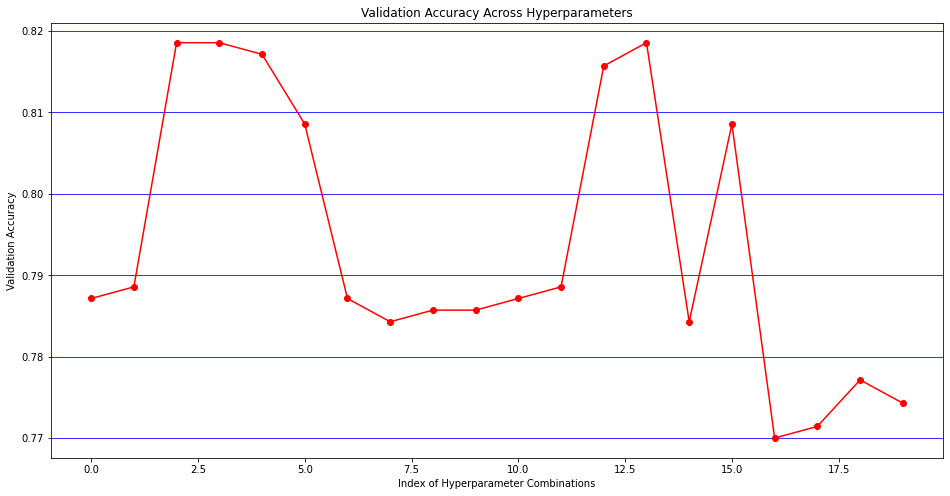

In [11]:
#basic tree
tree_params = best_params_research(Xtrain,False)

Best  Score: 0.7285714285714285
Best  Metrics: {'weights': 'distance', 'p': 1, 'n_neighbors': 20}


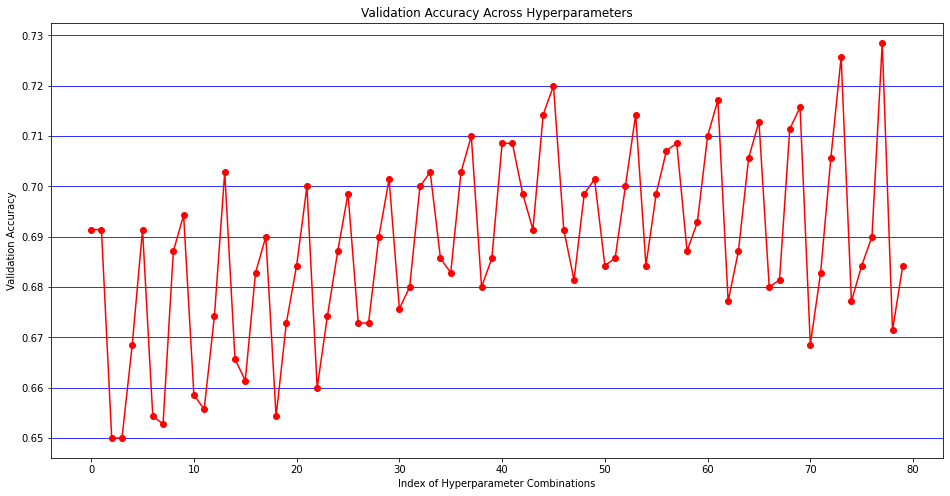

In [12]:
#basic knn
basic_knn_score = best_params_research(Xtrain)

Best  Score: 0.8071428571428572
Best  Metrics: {'weights': 'uniform', 'p': 1, 'n_neighbors': 11}


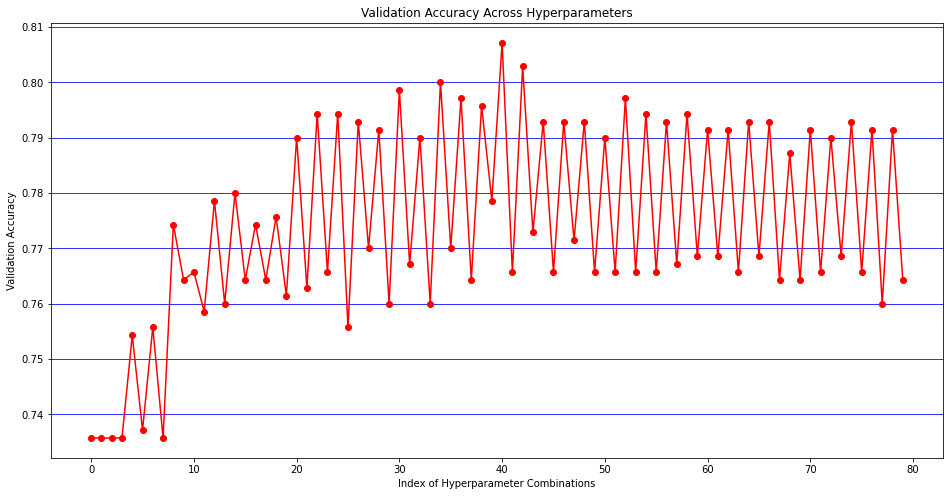

In [13]:
#MinMaxScalled knn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
knn_normalized_params = best_params_research(Xtrain_scaled)

Best  Score: 0.8085714285714285
Best  Metrics: {'weights': 'uniform', 'p': 2, 'n_neighbors': 12}


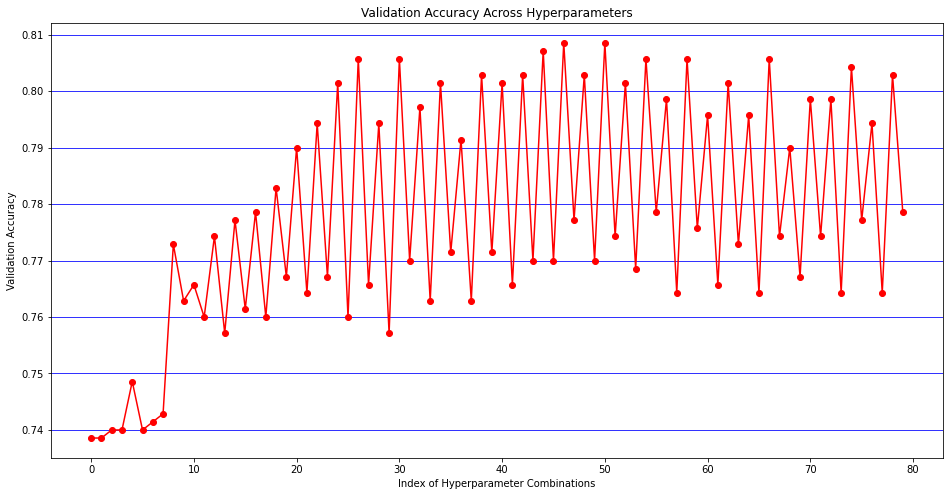

In [14]:
#Standartized knn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain_standard = scaler.fit_transform(Xtrain)
knn_standart_params = best_params_research(Xtrain_standard)

# Model Comparison: Decision Tree and Standardized KNN

After training both a basic Decision Tree and a standardized KNN model on the dataset, we observed that both models produced competitive accuracy scores. However, to determine which model truly performs better, we will use additional evaluation metrics. 

In the code snippet below, we:

1. **Draw the ROC Curve**: This visual representation helps us compare the models' true positive rate (TPR) versus false positive rate (FPR) across various classification thresholds.
2. **Calculate the AUC (Area Under the Curve)**: The AUC value summarizes the ROC curve into a single metric. Higher AUC values indicate better model performance.
3. **Compute the F1 Score**: As a balance between precision and recall, the F1 score helps assess the model's performance, especially when handling imbalanced data. This will show how well each model balances correctly identified positives against potential false positives.

By examining these metrics—ROC AUC and F1 score—we aim to establish a clear winner between the Decision Tree and standardized KNN models.


In [15]:
def draw_roc_plot(y_pred):
    roc_auc_tree = metrics.roc_auc_score(ytrain, y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(ytrain, y_pred_tree)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", label=f"AUC score ({roc_auc_tree:.3f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

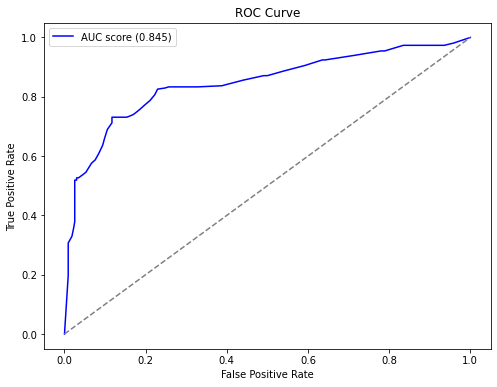

In [16]:
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_predict
best_tree = DecisionTreeClassifier(**tree_params,random_state = random_seed)
y_pred_tree = cross_val_predict(best_tree, Xtrain, ytrain, cv=10, method = "predict_proba")[:,1]
draw_roc_plot(y_pred_tree)

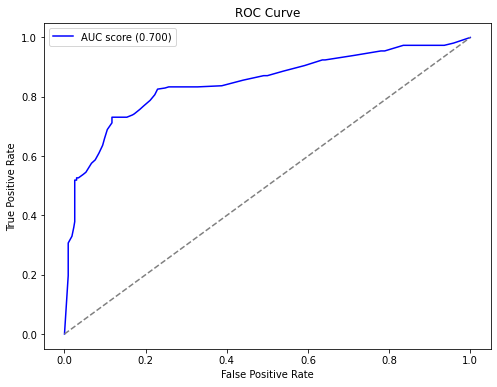

In [17]:
best_knn = KNeighborsClassifier(**knn_standart_params)
y_pred_knn = cross_val_predict(best_knn,Xtrain,ytrain,cv = 10,method = "predict_proba")[:, 1]
draw_roc_plot(y_pred_knn)

In [18]:
#Now let`s check out F1 score
threshold = 0.5
y_pred_tree_binary = (y_pred_tree >= threshold).astype("int64")
y_pred_knn_binary = (y_pred_knn >= threshold).astype("int64")
f1_tree = metrics.f1_score(ytrain,y_pred_tree_binary)
f1_knn = metrics.f1_score(ytrain,y_pred_knn_binary)
display(f1_tree)
display(f1_knn)

0.7475149105367794

0.5669291338582677

# Model Selection: Decision Tree as the Best Model

After evaluating both the Decision Tree and the standardized KNN model, we found that the Decision Tree outperformed KNN on both  metrics:

- **Higher F1 Score**: The Decision Tree achieved a higher F1 score, indicating a better balance between precision and recall in identifying positive instances. This is especially useful for datasets where precision and recall are crucial.
- **Higher AUC Score**: The Decision Tree also yielded a significantly higher ROC AUC score, showing stronger performance in distinguishing between positive and negative classes across thresholds.

Given these results, the Decision Tree is clearly the superior model for this task, offering better predictive performance and robustness. Therefore, we will proceed with the Decision Tree as our final model for this dataset.


In this step, we trained our `best_tree` model on the training data (`Xtrain`, `ytrain`) and then made predictions on the test data (`Xtest`). The resulting accuracy score of approximately 0.7967 reflects how well our model performs on unseen data.

In [19]:
best_tree.fit(Xtrain,ytrain)
final_prediction = best_tree.predict(Xtest)
metrics.accuracy_score(ytest,final_prediction)

0.7966666666666666

Finally lets get evaluation ID and model prediction to save them as `results.csv`

In [20]:
ID = evaluation.index
survived = best_tree.predict(evaluation)
final_df = pd.DataFrame({"ID" : ID , "survived" : survived})
final_df.to_csv("results",index = False)